In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display

%matplotlib inline

# 5 モデルの評価と改良

from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, y = make_blobs(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression().fit(X_train, y_train)
print("Test set score: {:.2f}".format(logreg.score(X_test, y_test)))

Test set score: 0.88


In [2]:
# 5.1 交差検証 cross-validation
#
# 汎化性能を評価
# 最もよく用いられる -> k分割交差検証 k-fold cross-validation
# k: 5~10 (in most case)
#
# Use sklearn.model_selection.cross_val_score()

from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression()

scores = cross_val_score(logreg, iris.data, iris.target)
print(f"Cross-validation scores: {scores}")

Cross-validation scores: [ 0.96078431  0.92156863  0.95833333]


In [3]:
# 5 folds
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print(f"Cross-validation scores: {scores}")

Cross-validation scores: [ 1.          0.96666667  0.93333333  0.9         1.        ]


In [4]:
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.96


In [5]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5)

print(f"Cross-validation scores:\n{cross_val_score(logreg, iris.data, iris.target, cv=kfold)}")

Cross-validation scores:
[ 1.          0.93333333  0.43333333  0.96666667  0.43333333]


In [6]:
kfold = KFold(n_splits=3)

print(f"Cross-validation scores:\n{cross_val_score(logreg, iris.data, iris.target, cv=kfold)}")

Cross-validation scores:
[ 0.  0.  0.]


In [7]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)

print(f"Cross-validation scores:\n{cross_val_score(logreg, iris.data, iris.target, cv=kfold)}")

Cross-validation scores:
[ 0.9   0.96  0.96]


In [8]:
# 1つ抜き交差検証 leave-one-out

from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("Number of cv iterations: ", len(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))

Number of cv iterations:  150
Mean accuracy: 0.95


In [9]:
# シャッフル分割交差検証 shuffle-split cross-validation

from sklearn.model_selection import ShuffleSplit

shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print(f"Cross-validation scores:\n{scores}")

Cross-validation scores:
[ 0.93333333  0.90666667  0.81333333  0.97333333  0.85333333  0.88        0.96
  0.97333333  0.92        0.90666667]


In [10]:
# グループ付き交差検証

from sklearn.model_selection import GroupKFold

X, y = make_blobs(n_samples=12, random_state=0)
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups, cv=GroupKFold(n_splits=3))
print(f"Cross-validation scores:\n{scores}")

Cross-validation scores:
[ 0.75        0.8         0.66666667]


In [11]:
# 5.2 グリッドサーチ

from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
print(f"Size of training set: {X_train.shape[0]} size of test set: {X_test.shape[0]}")

best_score = 0

arr = [0.001, 0.01, 0.1, 1, 10, 100] 
for gamma in arr:
    for C in arr:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_test, y_test)
        
        if score > best_score:
            best_score = score
            best_params = {'C': C, 'gamma': gamma}
            
print("Best score: {:.2f}".format(best_score))
print("Best params: {}".format(best_params))

Size of training set: 112 size of test set: 38
Best score: 0.97
Best params: {'C': 100, 'gamma': 0.001}


In [12]:
X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, random_state=1)
print(f"Size of training set: {X_train.shape[0]}  size of validation set: {X_valid.shape[0]} size of test set: {X_test.shape[0]}")

best_score = 0

arr = [0.001, 0.01, 0.1, 1, 10, 100] 
for gamma in arr:
    for C in arr:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_valid, y_valid)
        
        if score > best_score:
            best_score = score
            best_params = {'C': C, 'gamma': gamma}
            
svm = SVC(**best_params)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best params: {}".format(best_params))
print("Test set score with best params: {:.2f}".format(test_score))

Size of training set: 84  size of validation set: 28 size of test set: 38
Best score on validation set: 0.96
Best params: {'C': 10, 'gamma': 0.001}
Test set score with best params: 0.92


In [13]:
arr = [0.001, 0.01, 0.1, 1, 10, 100] 
param_grid = {'C': arr, 'gamma': arr}

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
grid_search.fit(X_train, y_train)

print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Test set score: 0.97


In [15]:
print(f"Best params: {grid_search.best_params_}")
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best params: {'C': 100, 'gamma': 0.01}
Best cross-validation score: 0.97


In [16]:
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Best estimator:
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [17]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.001080,0.000428,0.366071,0.366079,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000206,0.000102,0.011371,0.002852
1,0.001010,0.000349,0.366071,0.366079,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000225,0.000057,0.011371,0.002852
2,0.000980,0.000342,0.366071,0.366079,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000198,0.000057,0.011371,0.002852
3,0.000941,0.000349,0.366071,0.366079,0.001,1,"{'C': 0.001, 'gamma': 1}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000191,0.000120,0.011371,0.002852
4,0.000873,0.000319,0.366071,0.366079,0.001,10,"{'C': 0.001, 'gamma': 10}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000069,0.000053,0.011371,0.002852


In [18]:
# 5.3 評価基準とスコア
#
# アプリケーションの高レベルの目的を意識する -> ビジネス評価基準 business metric

from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

from sklearn.dummy import DummyClassifier

dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)

print(f"Unique predicted labels: {np.unique(pred_most_frequent)}")
print("Test score: {:.2f}".format(dummy_majority.score(X_test, y_test)))

Unique predicted labels: [False]
Test score: 0.90


In [19]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("Test score: {:.2f}".format(tree.score(X_test, y_test)))

Test score: 0.92


In [20]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("Dummy score: {:.2f}".format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("Logreg score: {:.2f}".format(logreg.score(X_test, y_test)))

Dummy score: 0.80
Logreg score: 0.98


In [21]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print(f"Confusion matric:\n{confusion}")

Confusion matric:
[[401   2]
 [  8  39]]


In [22]:
print("Most frequent class:", confusion_matrix(y_test, pred_most_frequent))
print("\nDummy model:", confusion_matrix(y_test, pred_dummy))
print("\nDecision tree:", confusion_matrix(y_test, pred_tree))
print("\nLogistic Regression:", confusion_matrix(y_test, pred_logreg))

Most frequent class: [[403   0]
 [ 47   0]]

Dummy model: [[369  34]
 [ 44   3]]

Decision tree: [[390  13]
 [ 24  23]]

Logistic Regression: [[401   2]
 [  8  39]]


In [23]:
from sklearn.metrics import f1_score

print("f1 score most frequent:       {:.2f}".format(f1_score(y_test, pred_most_frequent)))
print("f1 score dummy:               {:.2f}".format(f1_score(y_test, pred_dummy)))
print("f1 score tree:                {:.2f}".format(f1_score(y_test, pred_tree)))
print("f1 score logistic regression: {:.2f}".format(f1_score(y_test, pred_logreg)))

f1 score most frequent:       0.00
f1 score dummy:               0.07
f1 score tree:                0.55
f1 score logistic regression: 0.89


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_most_frequent, target_names=["not nine", "nine"]))

             precision    recall  f1-score   support

   not nine       0.90      1.00      0.94       403
       nine       0.00      0.00      0.00        47

avg / total       0.80      0.90      0.85       450



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [25]:
print(classification_report(y_test, pred_dummy, target_names=["not nine", "nine"]))

             precision    recall  f1-score   support

   not nine       0.89      0.92      0.90       403
       nine       0.08      0.06      0.07        47

avg / total       0.81      0.83      0.82       450



In [26]:
print(classification_report(y_test, pred_logreg, target_names=["not nine", "nine"]))

             precision    recall  f1-score   support

   not nine       0.98      1.00      0.99       403
       nine       0.95      0.83      0.89        47

avg / total       0.98      0.98      0.98       450



In [28]:
from mglearn.datasets import make_blobs

X, y = make_blobs(n_samples=(400, 50), centers=2, cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)

In [30]:
print(classification_report(y_test, svc.predict(X_test)))

             precision    recall  f1-score   support

          0       0.97      0.89      0.93       104
          1       0.35      0.67      0.46         9

avg / total       0.92      0.88      0.89       113



In [31]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8

print(classification_report(y_test, y_pred_lower_threshold))

             precision    recall  f1-score   support

          0       1.00      0.82      0.90       104
          1       0.32      1.00      0.49         9

avg / total       0.95      0.83      0.87       113



In [32]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

Text(0,0.5,'Recall')

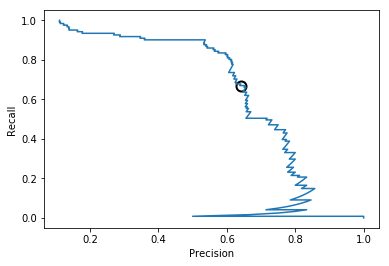

In [33]:
X, y = make_blobs(n_samples=(4000, 500), centers=2, cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)

precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label="threshold zero", fillstyle="none", c='k', mew=2)
plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")

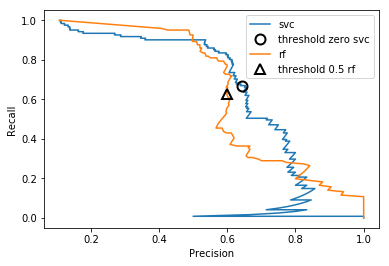

In [34]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(precision, recall, label="svc")
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label="threshold zero svc", fillstyle="none", c='k', mew=2)

plt.plot(precision_rf, recall_rf, label="rf")
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', markersize=10, label="threshold 0.5 rf", fillstyle="none", c='k', mew=2)

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

In [35]:
print("f1_score of random forest: {:.3f}".format(f1_score(y_test, rf.predict(X_test))))
print("f1_score of svc:           {:.3f}".format(f1_score(y_test, svc.predict(X_test))))

f1_score of random forest: 0.610
f1_score of svc:           0.656


In [36]:
from sklearn.metrics import average_precision_score

ap_rf  = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))

print("Average precision of random forest: {:.3f}".format(ap_rf))
print("Average precision of svc:           {:.3f}".format(ap_svc))

Average precision of random forest: 0.660
Average precision of svc:           0.666


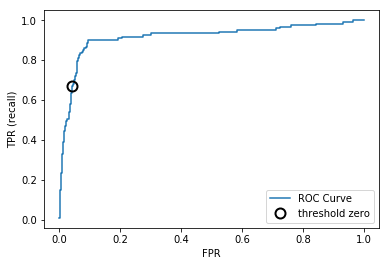

In [37]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

gamma = 1.00, accuracy = 0.90, AUC = 0.50
gamma = 0.05, accuracy = 0.90, AUC = 1.00
gamma = 0.01, accuracy = 0.90, AUC = 1.00


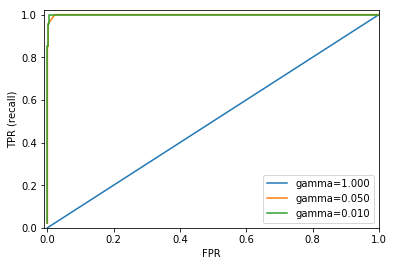

In [39]:
from sklearn.metrics import roc_auc_score

y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)
plt.figure()

for gamma in [1, 0.05, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test, svc.decision_function(X_test))
    print("gamma = {:.2f}, accuracy = {:.2f}, AUC = {:.2f}".format(gamma, accuracy, auc))
    plt.plot(fpr, tpr, label="gamma={:.3f}".format(gamma))
    
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")